In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [6]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [7]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


2. Check for missing values in all columns and describe your approach for handling them.

In [ ]:
df.isnull().sum()
# All the column have 0 missing values except ex_showroom_price
# ex_showroom_price has 435 missing values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [15]:
# Lets check the percentage of missing values
(df['ex_showroom_price'].isnull().sum() / len(df)) * 100

40.99905749293119

In [ ]:
# 41% is a big  -> If we just drop these rows, we will lose a lot of data.
# So we can fill the data with median values

In [87]:
df['ex_showroom_price'].fillna(df.groupby('name')['ex_showroom_price'].transform('median'), inplace=True)

df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,1.0,1st owner,350,147000.0
1,Honda Dio,45000,2017,1.0,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1.0,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1.0,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,1.0,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1.0,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,1.0,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,1.0,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,1.0,1st owner,53000,58000.0


In [20]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    327
dtype: int64

In [21]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

3. Plot the distribution of selling prices using a histogram and describe the overall trend.

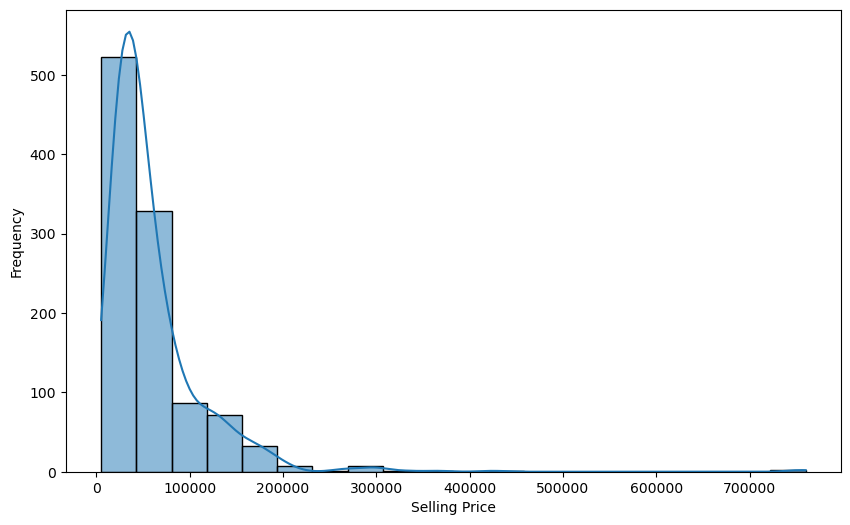

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins = 20)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Most of the selling prices are concentrated in the low range (below 1,00,000).
# The curve has a long tail stretching towards the higher prices 2,00,000 – ₹7,00,000+
# The highest bar (mode) is for bikes priced roughly between ₹20,000 and ₹60,000.
# A very small number of bikes are priced above 3,00,000
# The distribution is highly right-skewed.

4. Create a bar plot to visualize the average selling price for each seller_type and write one observation. 

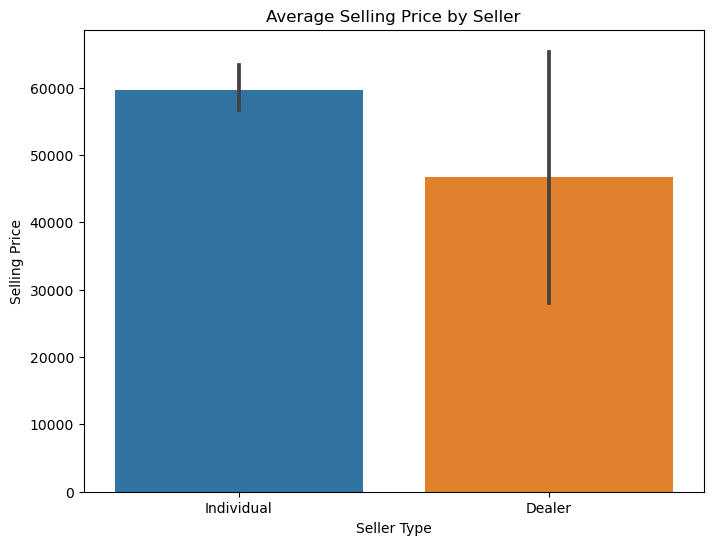

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'seller_type', y = 'selling_price', estimator='mean', data = df)
plt.title("Average Selling Price by Seller")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.show()

- Observation:

Most of the bikes have been sold individually

Individual sellers have a higher average selling price compared to Dealers.

5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

In [40]:
df['owner'].value_counts()

owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64

In [44]:
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()
avg_km

,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


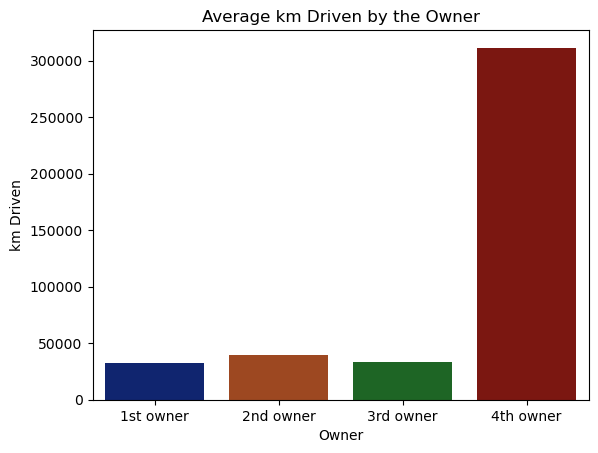

In [47]:
sns.barplot(x = 'owner', y = 'km_driven', data = avg_km, palette='dark')
plt.title('Average km Driven by the Owner')
plt.xlabel('Owner')
plt.ylabel('km Driven')
plt.show()

observation:

Comparing with all the owners, 4th owners bike has higher km driven

6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics. 

In [49]:
df['km_driven'].describe()

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [54]:
# Now calculate Q1(25th Percentile) and Q3(75th Percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper  bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Filtering the data frame to remove the outliers
df_no_outlier = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_no_outlier

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,147000.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [56]:
df_no_outlier['km_driven'].describe()

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

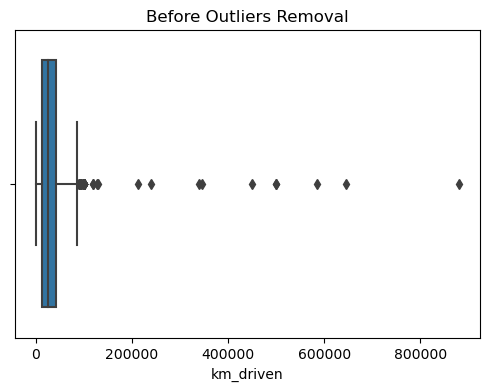

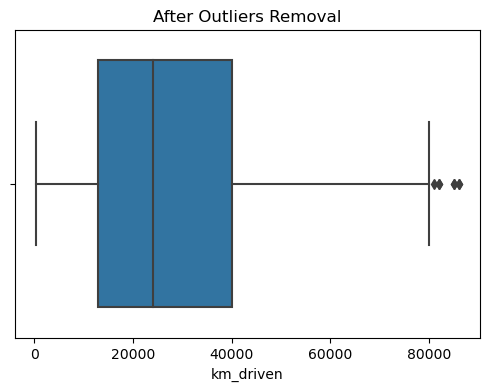

In [59]:
plt.figure(figsize=(6, 4))
sns.boxplot(x = df['km_driven'])
plt.title("Before Outliers Removal")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x = df_no_outlier['km_driven'])
plt.title('After Outliers Removal')
plt.show()

* Observation

Extreme outliers (up to 880,000 km) were removed -> Max dropped to 86,000.

Mean dropped (34,359 -> 28,203) and is now closer to Median (24,000) -> distribution is more balanced.

Standard deviation reduced (51,623 -> 19,552) -> less spread and variability.

Only 39 rows (3.7%) removed → minimal data loss, big improvement in quality.

7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price. 

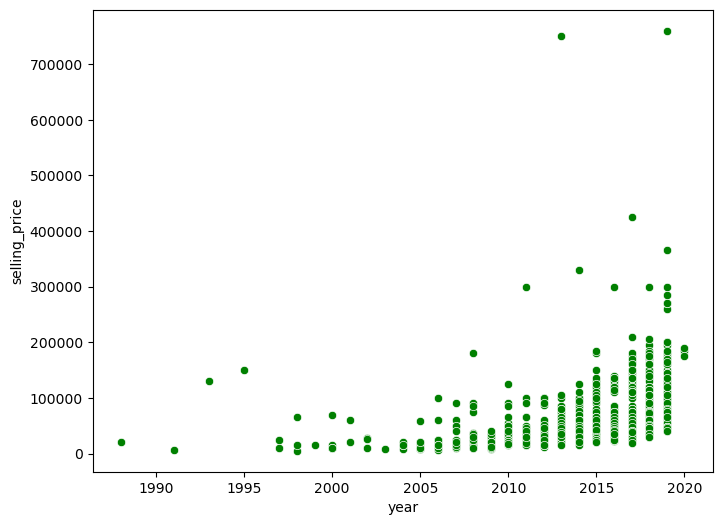

In [67]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'year', y = 'selling_price', data = df, color = 'green')
plt.show()

- Observation: Realationship between bike's age and price

Bikes from recent years (2015–2020) are clustered at higher selling prices.

Older bikes (pre-2005) are mostly at the low-price range, many below 1,00,000.

This confirms that as a bike gets older, its price drops.

8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame. 

In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
df['seller_type'] = encoder.fit_transform(df[['seller_type']])

df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,1.0,1st owner,350,147000.0
1,Honda Dio,45000,2017,1.0,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1.0,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1.0,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,1.0,2nd owner,21000,NaN


In [78]:
df['seller_type'].unique()

array([1., 0.])

9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most? 

In [80]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type          float64
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

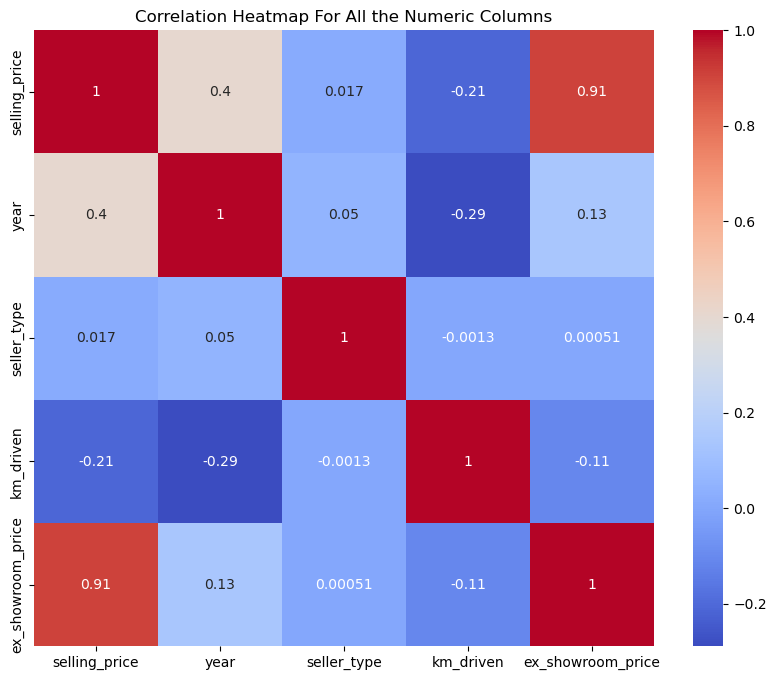

In [85]:
# Compute coorelation matrix for all the numeric columns
corr_matrix = df.corr(numeric_only = True)

# Making heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap For All the Numeric Columns')
plt.show()

* selling_price vs. ex_showroom_price -> 0.91

Very strong positive correlation 

Makes sense: bikes with higher original showroom price also have higher resale value.

* selling_price vs. year -> 0.40

Moderate positive correlation 

Newer bikes (higher year) generally sell for higher prices.

* km_driven vs. year -> -0.29

Weak-to-moderate negative correlation 

Older bikes tend to have higher kilometers driven.

* selling_price vs. km_driven -> -0.21

Weak negative correlation 

Higher km reduces resale price, but not as strongly as showroom price influences it.

Observation:

The strongest correlation is between selling_price and ex_showroom_price (0.91) -> showroom price is the biggest factor in resale price.

Bike age (year) matters too (0.40 correlation with selling price), though less than showroom price.

km_driven shows weak negative correlations, meaning mileage has some impact, but it’s not the dominant factor.

seller_type has almost no correlation with price or other numeric variables.

10. Summarize your findings in a brief report: 

● What are the most important factors affecting a bike's selling price? 

● Mention any data cleaning or feature engineering you performed. 

Bike Selling Price Analysis Report

1. Key Factors Affecting Selling Price

Ex-showroom price (corr = 0.91) -> The strongest predictor of resale price. Bikes that were originally more expensive tend to retain higher resale value.

Year of manufacture (corr = 0.40) -> Newer bikes sell for higher prices compared to older bikes.

Kilometers driven (corr = -0.21) -> Higher mileage reduces selling price, though the effect is weaker compared to showroom price.

Seller type (corr ≈ 0) -> No significant influence on resale price.

2. Data Cleaning Performed

Handled Missing Values:

Filled missing values in ex_showroom_price using the median grouped by bike name (to ensure realistic values).

Outlier Treatment:

Applied the IQR method on km_driven to remove extreme mileage values. This reduced noise and brought down max km from 880,000 to 86,000.

Type Conversion:

Converted ex_showroom_price from float64 to int after filling missing values.

 3. Feature Engineering

One-Hot Encoding:

Converted categorical variable seller_type into numeric format using one-hot encoding. Since it had only 2 categories, it was encoded as 0 and 1.

Correlation Analysis:

Built a correlation heatmap to identify the most important features for predicting selling_price.

Final Insights

Ex-showroom price is the most influential factor in resale pricing.

Newer bikes generally fetch higher prices, while higher mileage lowers the price.

Seller type does not meaningfully affect resale values.